# Notebook Essai Hydropower

## Importation des packages

In [42]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint, solve_ivp

## Formalisation du système

In [43]:
def hydropower (Q, n) : 
    P = 1 * 1000 * 9.81 * 15 * Q * n
    return P

## Simulation

In [44]:
n_sim = 1000 ##Nombre de simulations 
eta0 = 0.80 ## Efficience 
delta_samples = np.random.uniform(0.005, 0.015, n_sim) ## Taux de dégradation 
t = np.arange(0,50, 1) ## Année de simulation 
## Moyenne 
Q_mean = 1.5  ##Débit moyen
Q_var = 0.4  ##Variation de 20% pour le débit 


P_sims = np.zeros((n_sim, len(t))) ## stockage de la production simulée

for i in range(n_sim) : 
    Q_t = np.random.lognormal(mean=np.log(Q_mean),sigma=Q_var,size=len(t))
    eta_t = eta0 * np.exp(-delta_samples[i] * t)
    P_sims[i, :] = hydropower(Q_t, eta_t)

## Calcul des grandeurs 

In [48]:
## Médiane et percentiles 
median_P = np.median(P_sims, axis = 0)
q5 = np.percentile(P_sims, 5, axis =0)
q95 = np.percentile(P_sims, 95, axis = 0)

## Energie annuelle 
secon_year = 365*24*3600
E_annual = np.mean(P_sims, axis = 1) * secon_year / 3.6e6

In [59]:
q50 = np.percentile(E_annual, 50)/1e6 ## P50 en GWh
q90 = np.percentile(E_annual, 10)/1e6 ## P90 en GWh
q75 = np.percentile(E_annual, 25)/1e6 ## P75 en GWh
for q in list((q50, q75, q90)) : 
    print(q)

1.3253872534962339
1.2443494241585797
1.1790533965256127


## Graphique

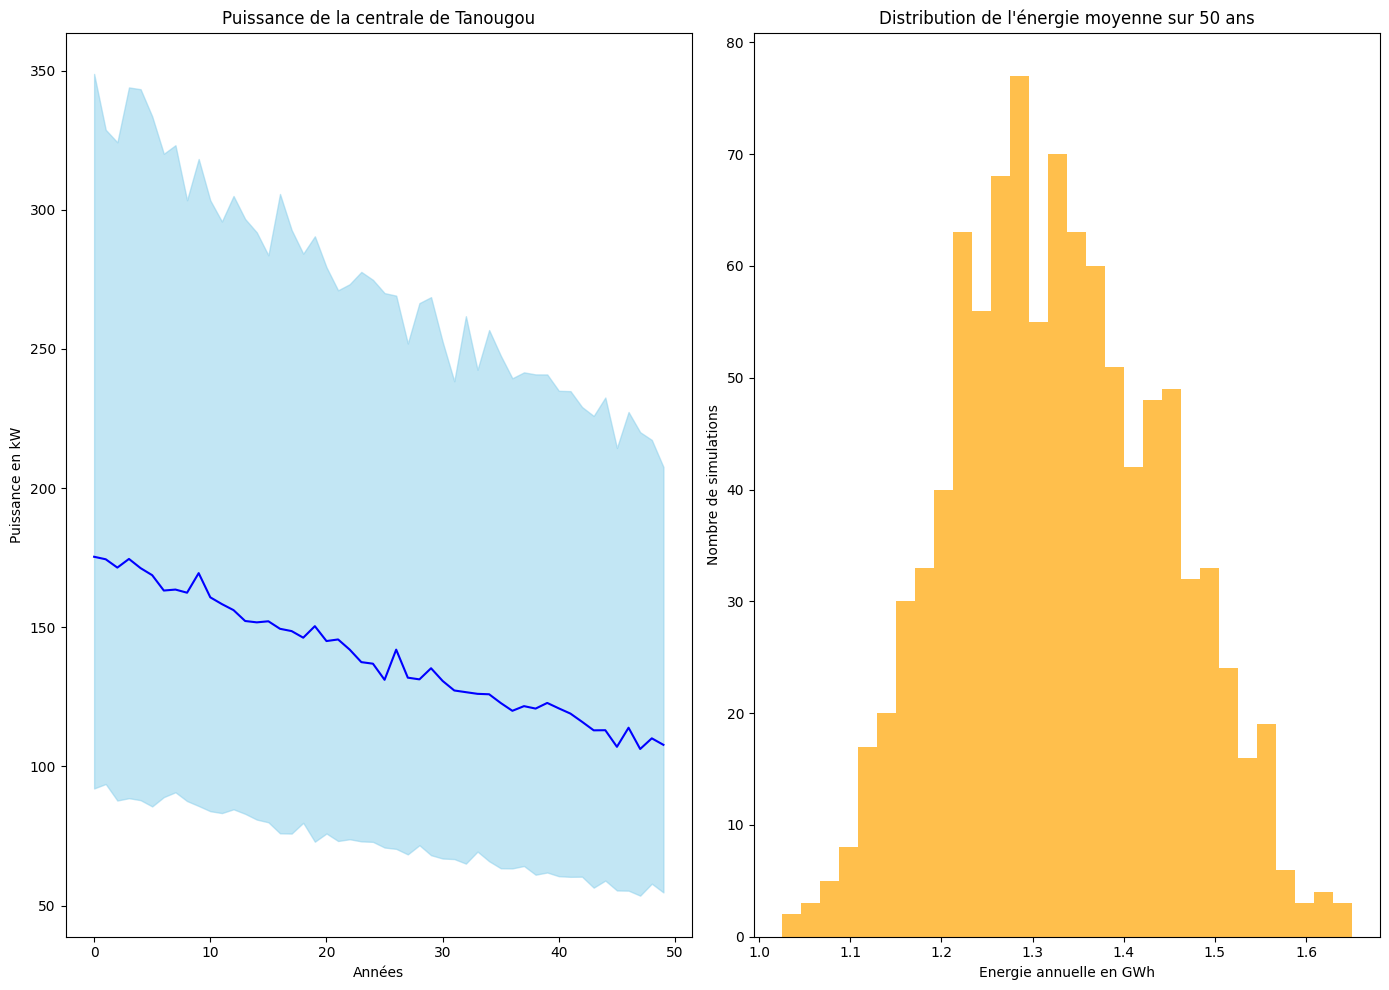

In [57]:
## Graphique
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

## Graphique 1 
axes[0].fill_between(t, q5/1000, q95/1000, color = "skyblue", alpha = 0.5, label = '5-95%')
axes[0].plot(t, median_P/1000, color = "blue", label = 'Médiane')
axes[0].set_ylabel('Puissance en kW')
axes[0].set_xlabel('Années')
axes[0].set_title('Puissance de la centrale de Tanougou')

## Graphique 2  
axes[1].hist(E_annual/1e6, bins = 30, color = "orange", alpha = 0.7)
axes[1].set_xlabel('Energie annuelle en GWh')
axes[1].set_ylabel('Nombre de simulations')
axes[1].set_title('Distribution de l\'énergie moyenne sur 50 ans')

plt.tight_layout()
plt.show()